In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

Extent       Date
0    1179855.894 1979-01-01
1     879585.254 1979-02-01
2     791619.096 1979-03-01
3    1254912.071 1979-04-01
4    1620142.247 1979-05-01
..           ...        ...
533  1556568.455 2023-06-01
534  1917507.979 2023-07-01
535  2601630.327 2023-08-01
536  2534223.780 2023-09-01
537  2373004.525 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2336 - root_mean_squared_error: 0.4833

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 8s 92ms/step - loss: 0.2368 - root_mean_squared_error: 0.4866 - val_loss: 0.2239 - val_root_mean_squared_error: 0.4732
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1871 - root_mean_squared_error: 0.4325

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1872 - root_mean_squared_error: 0.4327 - val_loss: 0.1974 - val_root_mean_squared_error: 0.4444
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1509 - root_mean_squared_error: 0.3885

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.1509 - root_mean_squared_error: 0.3885 - val_loss: 0.1769 - val_root_mean_squared_error: 0.4206
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1185 - root_mean_squared_error: 0.3442

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1224 - root_mean_squared_error: 0.3499 - val_loss: 0.1526 - val_root_mean_squared_error: 0.3906
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0930 - root_mean_squared_error: 0.3050

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0936 - root_mean_squared_error: 0.3059 - val_loss: 0.1288 - val_root_mean_squared_error: 0.3588
Epoch 6/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0728 - root_mean_squared_error: 0.2698

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0702 - root_mean_squared_error: 0.2650 - val_loss: 0.1077 - val_root_mean_squared_error: 0.3282
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0568 - root_mean_squared_error: 0.2382

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0558 - root_mean_squared_error: 0.2362 - val_loss: 0.0881 - val_root_mean_squared_error: 0.2968
Epoch 8/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0446 - root_mean_squared_error: 0.2112

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2677
Epoch 9/50
53/53 [==============================] - ETA: 0s - loss: 0.0310 - root_mean_squared_error: 0.1760

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0310 - root_mean_squared_error: 0.1760 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2276
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0242 - root_mean_squared_error: 0.1554

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0243 - root_mean_squared_error: 0.1558 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1934
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0217 - root_mean_squared_error: 0.1473

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0218 - root_mean_squared_error: 0.1476 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1550
Epoch 12/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0215 - root_mean_squared_error: 0.1467

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0206 - root_mean_squared_error: 0.1435 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1447
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.1196

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1088

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1124

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1031
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 19/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1091

INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1279
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0116 - root_mean_squared_error: 0.1075 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1103
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1164
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0134 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.529630676905314 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

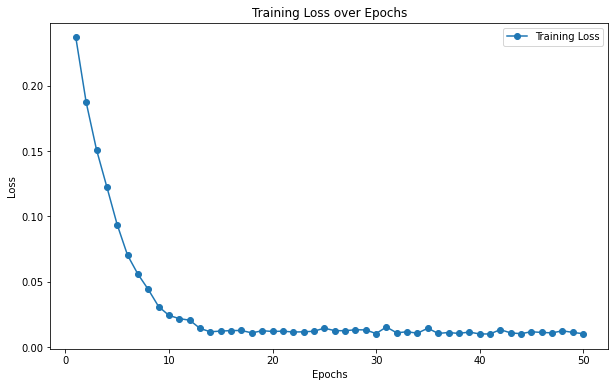

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

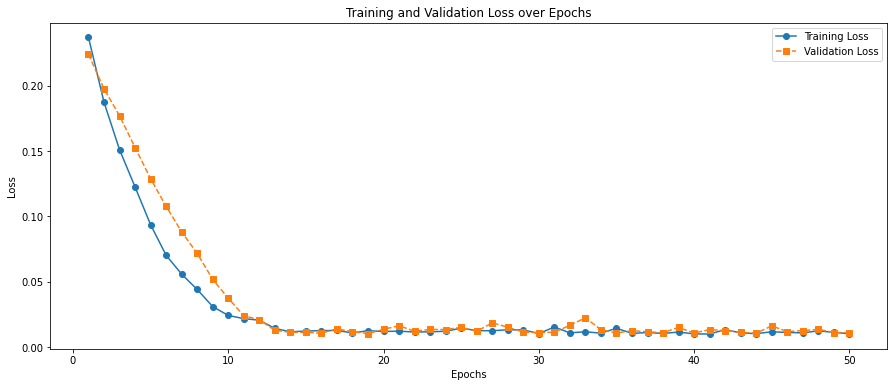

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09134177573320586
MAE : 0.07390858407950361


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        6.847209e+05     752834.272
1        4.147775e+05     451914.219
2        3.928487e+05     439855.813
3        7.171502e+05     807857.307
4        1.055534e+06    1184280.145
5        1.454878e+06    1468308.405
6        1.810980e+06    1540851.607
7        2.012250e+06    1989099.836
8        1.986251e+06    2096990.761
9        1.938667e+06    2080961.032
10       1.713656e+06    1695704.661
11       1.255364e+06    1533888.370
12       7.141862e+05    1038332.675
13       5.691331e+05     602954.621
14       6.054403e+05     895484.288
15       8.255006e+05    1070622.700
16       1.142657e+06    1532457.922
17       1.424482e+06    1703762.123
18       1.837559e+06    1855079.122
19       2.082195e+06    2291960.639
20       2.154020e+06    2114120.417
21       2.117260e+06    1995818.759
22       1.806761e+06    1653379.997
23       1.302426e+06    1070814.995
24       8.444600e+05     689443.815
25       8.582294e+05     401148.663
26       8.150947e+05     346558.057
27       1.069690e+06     599477.678
28       1.306218e+06     765764.905
29       1.589782e+06    1304133.179
30       1.847553e+06    1598436.099
31       2.088609e+06    1763844.414
32       1.961973e+06    1979139.524
33       1.912742e+06    1937348.663
34       1.553299e+06    1833093.342
35       1.193010e+06    1089676.114
36       7.166952e+05     453484.731
37       4.717655e+05     251559.554
38       3.782615e+05     351294.657
39       5.371993e+05     702389.714
40       9.868826e+05    1185169.054
41       1.359892e+06    1556568.455
42       1.770545e+06    1917507.979
43       2.083449e+06    2601630.327
44       2.084307e+06    2534223.780
45       1.999613e+06    2373004.525

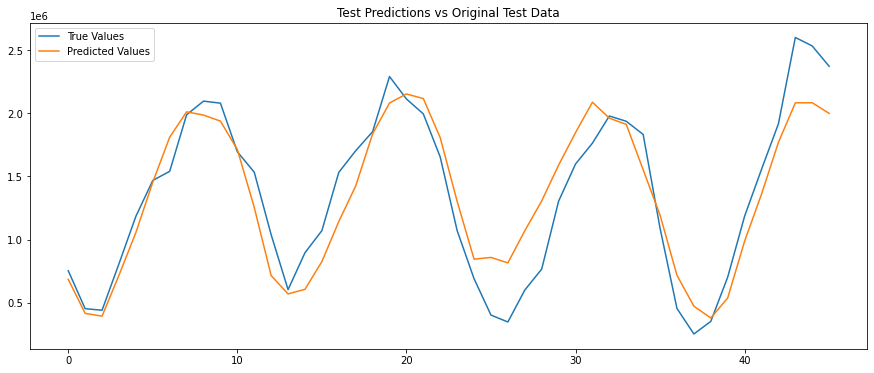

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

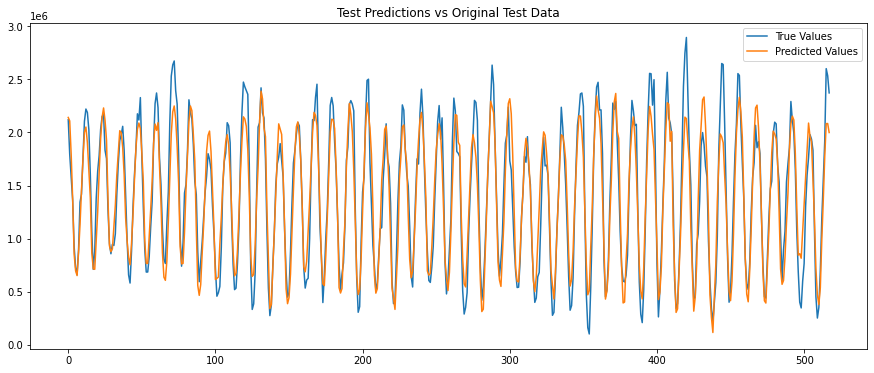

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()